In [14]:
import numpy as np
from uncertainties import ufloat, unumpy
import uncertainties.umath
import matplotlib.pyplot as plt
from sympy import *
from tqdm import tqdm

In [3]:
s_12=Symbol("s_12",real=True)
s_23=Symbol("s_23",real=True)
s_13=Symbol("s_13",real=True)

c_12=Symbol("c_12",real=True)
c_23=Symbol("c_23",real=True)
c_13=Symbol("c_13",real=True)

d_cp=Symbol("d_cp",real=True)

def PMNS_param_matrix():
    m=Matrix([
        [c_12*c_13,s_12*c_13,s_13*exp(-d_cp*1j)],
        [-s_12*c_23-c_12*s_23*s_13*exp(d_cp*1j),c_12*c_23-s_12*s_23*s_13*exp(d_cp*1j),s_23*c_13],
        [s_12*s_23-c_12*c_23*s_13*exp(d_cp*1j),-c_12*s_23-s_12*c_23*s_13*exp(d_cp*1j),c_23*c_13]])

    return m

In [4]:
PMNS_param_matrix()

Matrix([
[                                  c_12*c_13,                                   c_13*s_12, s_13*exp(-1.0*I*d_cp)],
[-c_12*s_13*s_23*exp(1.0*I*d_cp) - c_23*s_12,  c_12*c_23 - s_12*s_13*s_23*exp(1.0*I*d_cp),             c_13*s_23],
[-c_12*c_23*s_13*exp(1.0*I*d_cp) + s_12*s_23, -c_12*s_23 - c_23*s_12*s_13*exp(1.0*I*d_cp),             c_13*c_23]])

In [27]:
PMNS[0,1]

c_13*s_12

In [ ]:
L=Symbol("L",real=True,positive=True)
E_nu=Symbol("E_nu",real=True)
D_m_12=Symbol("D_m_12",real=True)
D_m_13=Symbol("D_m_13",real=True)
D_m_23=Symbol("D_m_23",real=True)

In [28]:
def Prob_a_to_b(a,b):
    if a == "e":
        index_a=0
    elif a == "mu":
        index_a=1
    elif a == "tau":
        index_a=2
    else:
        raise ValueError("Non existing neutrino flavor for initial state.")
    
    if b == "e":
        index_b=0
    elif b == "mu":
        index_b=1
    elif b == "tau":
        index_b=2
    else:
        raise ValueError("Non existing neutrino flavor for final state.")

    f=PMNS[index_b,0]*conjugate(PMNS[index_a,0])*PMNS[index_a,1]*conjugate(PMNS[index_b,1])
    s=PMNS[index_b,0]*conjugate(PMNS[index_a,0])*PMNS[index_a,2]*conjugate(PMNS[index_b,2])
    t=PMNS[index_b,1]*conjugate(PMNS[index_a,1])*PMNS[index_a,2]*conjugate(PMNS[index_b,2])

    first=re(f)*sin((D_m_12*L)/(4*E_nu))**2
    second=re(s)*sin((D_m_13*L)/(4*E_nu))**2
    third=re(t)*sin((D_m_23*L)/(4*E_nu))**2

    return -4*(first+second+third)

In [26]:
PMNS=PMNS_param_matrix()
#These values are true for nu_mu to nu_e
f=PMNS[0,0]*conjugate(PMNS[1,0])*PMNS[1,1]*conjugate(PMNS[0,1])
s=PMNS[0,0]*conjugate(PMNS[1,0])*PMNS[1,2]*conjugate(PMNS[0,2])
t=PMNS[0,1]*conjugate(PMNS[1,1])*PMNS[1,2]*conjugate(PMNS[0,2])

In [7]:
#These values where taken from the JUNO physics book
def s_ij(i,j):
    if (i==1 and j==2) or (i==2 and j==1):
        return 0.302**(1/2)
        #return (ufloat(0.308,0.05))**(1/2)
    elif (i==1 and j==3) or (i==3 and j==1):
        return 0.0227**(1/2)
        #return (ufloat(0.0234,0.00595))**(1/2)
    elif (i==2 and j==3) or (i==3 and j==2):
        return 0.413**(1/2)
        #return (ufloat(0.437,0.125))**(1/2)
    elif (i==j):
        raise ValueError("Not mixing! i=j")
    else:
        raise ValueError("Not excisting eigenstates! Must be 1,2 or 3.")

def c_ij(i,j):
    return (1-(s_ij(i,j)**2))**(1/2)

In [31]:
e="e"
mu="mu"
tau="tau"

In [50]:
final=Prob_a_to_b(mu,mu).subs([(s_12,s_ij(1,2)),(c_12,c_ij(1,2)),(c_13,c_ij(1,3)),(c_23,c_ij(2,3)),(s_13,s_ij(1,3)),(s_23,s_ij(2,3)),(d_cp,delta_cp)])

In [139]:
final=angle_rep

In [63]:
final_1_E=final.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,1)])
final_2_E=final.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,0.1)])
final_3_E=final.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,0.01)]) 

In [64]:
final_1_d=final.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(L,15)])
final_2_d=final.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(L,13000)])

Values used in this measurements taken $\delta_cp$ was taken from the 191960.pdf article(Table 8)<br>
$\sin^2\theta_{12}=0.302^{+0.013}_{-0.012}$<br>
$\sin^2\theta_{13}=0.0227^{+0.0023}_{-0.0024}$<br>
$\sin^2\theta_{23}=0.413^{+0.037}_{-0.025}$<br>

$\Delta m^2_{21}= 7.5^{+0.18}_{-0.19}\times 10^{-5} eV^2$<br> 
$\Delta m^2_{31}= 2.473^{+0.07}_{-0.067}\times 10^{-3} eV^2$(NH)<br>
$\Delta m^2_{32}= -2.427^{+0.042}_{-0.065}\times 10^{-3} eV^2$(IH)<br>

$\delta_{cp}=300^{+66}_{-138} $

In [72]:
l=["a",12,False,[1,2,3]]

In [74]:
l.append([4,5,6,7])

In [75]:
print(l)

['a', 12, False, [1, 2, 3], [4, 5, 6, 7]]


In [65]:
to_plot_1_E=[]
to_plot_2_E=[]
to_plot_3_E=[]

to_plot_1_d=[]
to_plot_2_d=[]

dist=np.arange(0,13000,1)

print("Calculation for the function of distance started!")
for i in tqdm(dist):
    to_plot_1_E.append(final_1_E.subs([(L,i)]))
    to_plot_2_E.append(final_2_E.subs([(L,i)]))
    to_plot_3_E.append(final_3_E.subs([(L,i)]))
print("Distance Done!")

eneg_range_1=np.arange(0.001,0.1,0.00001)
eneg_range_2=np.arange(0.1,10,0.001)    

print("Calculation for the function of energy started!")
for j in tqdm(eneg_range_1):
    to_plot_1_d.append(final_1_d.subs([(E_nu,j)]))
    to_plot_2_d.append(final_2_d.subs([(E_nu,j)]))
print("First Done!")
for j in tqdm(eneg_range_2):
    to_plot_1_d.append(final_1_d.subs([(E_nu,j)]))
    to_plot_2_d.append(final_2_d.subs([(E_nu,j)]))
print("Second Done!")
print("DONE!!")

  0%|          | 9/13000 [00:00<02:34, 84.06it/s]

Calculation for the function of distance started!


  0%|          | 24/9900 [00:00<01:24, 117.35it/s]

Distance Done!
Calculation for the function of energy started!


  0%|          | 10/9900 [00:00<01:46, 92.56it/s]

First Done!


100%|██████████| 9900/9900 [01:36<00:00, 102.28it/s]

Second Done!
DONE!!


In [54]:
a="mu"

In [57]:
print("a\"+a+"b")

SyntaxError: EOL while scanning string literal (<ipython-input-57-73d7372b6783>, line 1)

Text(0, 0.5, 'P$(\\nu_{\\mu}\\rightarrow\\nu_{e})$')

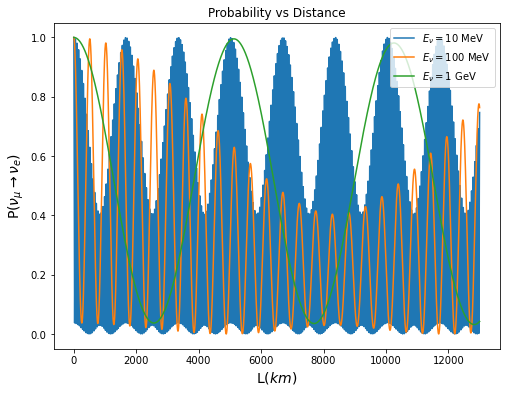

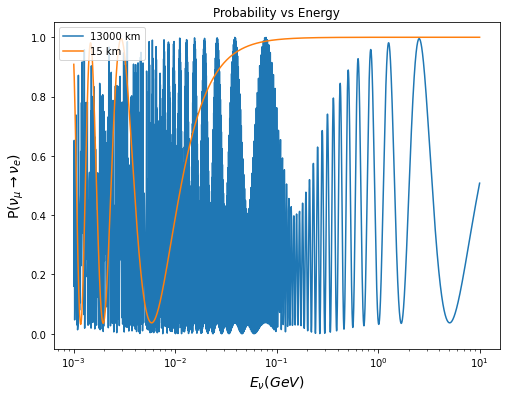

In [69]:
plt.figure(figsize=(8,6))

plt.plot(dist,[1+i for i in to_plot_3_E],label=r"$E_{\nu}=10$ MeV")
plt.plot(dist,[1+i for i in to_plot_2_E],label=r"$E_{\nu}=100$ MeV")
plt.plot(dist,[1+i for i in to_plot_1_E],label=r"$E_{\nu}=1$ GeV")
plt.xlabel(r"L$(km)$",fontsize=14)


plt.legend()
plt.title("Probability vs Distance")
#plt.ylim(0,1)
plt.ylabel(r"P$(\nu_{\mu}\rightarrow\nu_e)$",fontsize=14)

#plt.savefig("Prob_Dist_mu_tau.pdf")

plt.figure(figsize=(8,6))

plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),[1+i for i in to_plot_2_d],label="13000 km")
plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),[1+i for i in to_plot_1_d],label="15 km")
plt.xscale("log")
plt.xlabel(r"$E_{\nu}(GeV)$",fontsize=14)

plt.legend()
plt.title("Probability vs Energy")
#plt.ylim(0,1)
plt.ylabel(r"P$(\nu_{\mu}\rightarrow\nu_{e})$",fontsize=14)


#plt.savefig("Prob_Eneg_mu_tau.pdf")

In [92]:
theta_12=Symbol("theta_12")
theta_23=Symbol("theta_23")
theta_13=Symbol("theta_13")

In [95]:
angle_rep=Prob_mu_to_e(f,s,t).subs([(s_12,sin(theta_12)),(c_12,cos(theta_12)),(c_13,cos(theta_13)),(c_23,cos(theta_23)),(s_13,sin(theta_13)),(s_23,sin(theta_23))])

In [99]:
angle_rep=angle_rep.subs([(theta_12,np.arcsin(np.sqrt(0.308))),(theta_13,np.arcsin(np.sqrt(0.0234))),(theta_23,np.arcsin(np.sqrt(0.437))),(d_cp,delta_cp)])

In [91]:
simplify(Prob_mu_to_e(f,s,t))

4*c_13**2*(c_12*s_12*(c_12**2*c_23*s_13*s_23*cos(1.0*d_cp) + c_12*c_23**2*s_12 - c_12*s_12*s_13**2*s_23**2 - c_23*s_12**2*s_13*s_23*cos(1.0*d_cp))*sin(D_m_12*L/(4*E_nu))**2 + c_12*s_13*s_23*(c_12*s_13*s_23 + c_23*s_12*cos(1.0*d_cp))*sin(D_m_13*L/(4*E_nu))**2 + s_12*s_13*s_23*(-c_12*c_23*cos(1.0*d_cp) + s_12*s_13*s_23)*sin(D_m_23*L/(4*E_nu))**2)

In [88]:
simplify(final)

-0.248819365104936*cos(D_m_12*L/(2*E_nu)) - 0.0625218436227803*cos(D_m_13*L/(2*E_nu)) + 0.0425488110627802*cos(D_m_23*L/(2*E_nu)) + 0.268792397664936

In [97]:
re(f).subs([(s_12,s_ij(1,2)),(c_12,c_ij(1,2)),(c_13,c_ij(1,3)),(c_23,c_ij(2,3)),(s_13,s_ij(1,3)),(s_23,s_ij(2,3)),(d_cp,delta_cp)])

0.875590317447532

In [85]:
def PMNS_matrix():
    
    exp_cp=ufloat(np.exp(1j*delta_cp),0)
    nexp_cp=ufloat(np.exp(-1j*delta_cp),0)
    #First row
    matrix=np.array([c_ij(1,2)*c_ij(1,3),s_ij(1,2)*c_ij(1,3),s_ij(1,3)*nexp_cp],
        [-s_ij(1,2)*c_ij(2,3)-c_ij(1,2)*s_ij(2,3)*s_ij(1,3)*exp_cp,c_ij(1,2)*c_ij(2,3)-s_ij(1,2)*s_ij(2,3)*s_ij(1,3)*exp_cp,s_ij(2,3)*c_ij(1,3)],
        [s_ij(1,2)*s_ij(2,3)-c_ij(1,2)*c_ij(2,3)*s_ij(2,3)*exp_cp,-c_ij(1,2)*s_ij(2,3)-s_ij(1,2)*c_ij(2,3)*s_ij(1,3)*exp_cp,c_ij(2,3)*c_ij(1,3)])

    return matrix
    

In [43]:
c_ij(1,2)*c_ij(1,3)

0.8220749357570756+/-0.02980463354156128

In [37]:
a=np.zeros((3,3))
a[0,1]=1
print(a)

[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [36]:
c_ij(2,1)**c_ij(1,3)

0.8336695969391601+/-0.029767238748437508

In [80]:
import sympy

ModuleNotFoundError: No module named 'sympy'